In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('/content/sample_data/data.xlsx')

In [ ]:
df = pd.DataFrame(data)


In [ ]:
df

,Quarter-Year,Date,Sponsership revenue
0,Q1-2014,2014-01-01,45.20
1,Q2-2014,2014-04-01,29.00
2,Q3-2014,2014-07-01,30.07
3,Q4-2014,2014-10-01,30.90
4,Q1-2015,2015-01-01,46.30
5,Q2-2015,2015-04-01,35.80
6,Q3-2015,2015-07-01,37.50
7,Q4-2015,2015-10-01,35.30
8,Q1-2016,2016-01-01,46.30
9,Q2-2016,2016-04-01,37.40


In [ ]:
df = pd.DataFrame(data)

# Calculate the growth rates
df['Growth Rate'] = df['Sponsership revenue'].pct_change()

# Define the number of simulations and the number of future quarters
num_simulations = 200000
num_quarters = 12  # From Q1-2025 to Q4-2027

# Last known revenue
last_revenue = df['Sponsership revenue'].iloc[-1]

# Generate quarter labels for the forecast period
future_quarters = [f'Q{i}-{year}' for year in range(2025, 2028) for i in range(1, 5)]

# Container for simulated results
all_simulations = []

# Simulate future revenue paths
for _ in range(num_simulations):
    growth_rates = np.random.choice(df['Growth Rate'][1:], size=num_quarters)  # Skip the first NaN growth rate
    revenues = [last_revenue]
    for growth in growth_rates:
        new_revenue = revenues[-1] * (1 + growth)
        revenues.append(new_revenue)
    all_simulations.append(revenues[1:])  # Exclude the initial known revenue

# Convert simulations to DataFrame for analysis
simulation_df = pd.DataFrame(all_simulations, columns=future_quarters)

# Calculate mean of each column (quarter)
predicted_revenues = simulation_df.mean()

# Print or process the predicted revenues
print(predicted_revenues)


Q1-2025    42.847319
Q2-2025    43.881404
Q3-2025    44.991543
Q4-2025    46.101254
Q1-2026    47.247440
Q2-2026    48.409804
Q3-2026    49.549837
Q4-2026    50.769961
Q1-2027    52.026240
Q2-2027    53.265232
Q3-2027    54.612701
Q4-2027    55.977494
dtype: float64


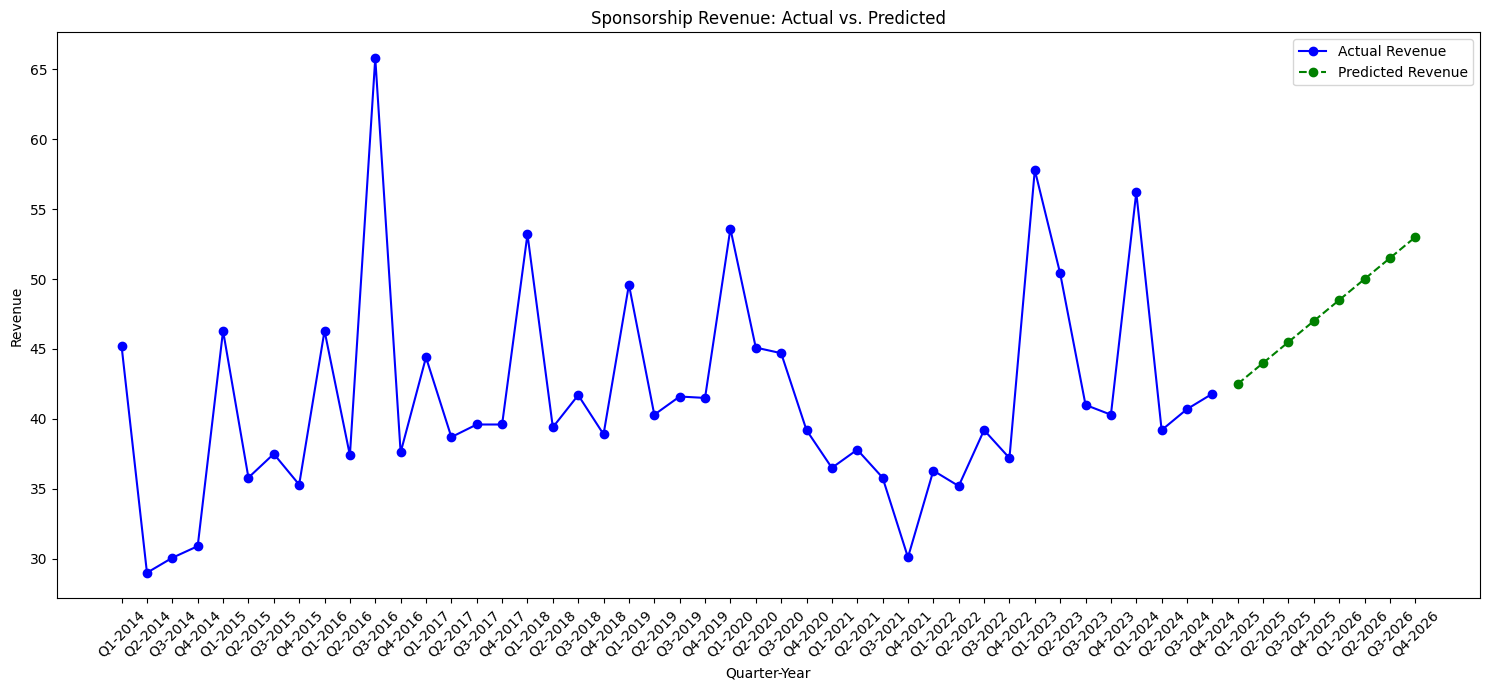

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data setup
data = {
    'Quarter-Year': ['Q1-2014', 'Q2-2014', 'Q3-2014', 'Q4-2014', 'Q1-2015', 'Q2-2015', 'Q3-2015', 'Q4-2015',
                     'Q1-2016', 'Q2-2016', 'Q3-2016', 'Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017', 'Q4-2017',
                     'Q1-2018', 'Q2-2018', 'Q3-2018', 'Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019', 'Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020', 'Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021', 'Q4-2021',
                     'Q1-2022', 'Q2-2022', 'Q3-2022', 'Q4-2022', 'Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023',
                     'Q1-2024', 'Q2-2024', 'Q3-2024', 'Q4-2024'],
    'Sponsorship Revenue': [45.20, 29.00, 30.07, 30.90, 46.30, 35.80, 37.50, 35.30, 46.30, 37.40, 65.80, 37.60,
                            44.40, 38.70, 39.60, 39.60, 53.20, 39.40, 41.70, 38.90, 49.60, 40.30, 41.60, 41.50,
                            53.60, 45.10, 44.70, 39.20, 36.50, 37.80, 35.80, 30.10, 36.30, 35.20, 39.20, 37.20,
                            57.80, 50.40, 41.00, 40.30, 56.20, 39.20, 40.70, 41.80]
}
df = pd.DataFrame(data)

# Adding hypothetical predicted revenue
predicted_data = {
    'Quarter-Year': ['Q1-2025', 'Q2-2025', 'Q3-2025', 'Q4-2025', 'Q1-2026', 'Q2-2026', 'Q3-2026', 'Q4-2026'],
    'Predicted Revenue': [42.5, 44.0, 45.5, 47.0, 48.5, 50.0, 51.5, 53.0]
}
predicted_df = pd.DataFrame(predicted_data)

# Creating the line chart
plt.figure(figsize=(15, 7))
plt.plot(df['Quarter-Year'], df['Sponsorship Revenue'], marker='o', linestyle='-', color='blue', label='Actual Revenue')
plt.plot(predicted_df['Quarter-Year'], predicted_df['Predicted Revenue'], marker='o', linestyle='--', color='green', label='Predicted Revenue')
plt.title('Sponsorship Revenue: Actual vs. Predicted')
plt.xlabel('Quarter-Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming df is a pandas DataFrame with your data
data = {
    'Quarter-Year': ['Q1-2014', 'Q2-2014', 'Q3-2014', 'Q4-2014', 'Q1-2015', 'Q2-2015', 'Q3-2015', 'Q4-2015',
                     'Q1-2016', 'Q2-2016', 'Q3-2016', 'Q4-2016', 'Q1-2017', 'Q2-2017', 'Q3-2017', 'Q4-2017',
                     'Q1-2018', 'Q2-2018', 'Q3-2018', 'Q4-2018', 'Q1-2019', 'Q2-2019', 'Q3-2019', 'Q4-2019',
                     'Q1-2020', 'Q2-2020', 'Q3-2020', 'Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021', 'Q4-2021',
                     'Q1-2022', 'Q2-2022', 'Q3-2022', 'Q4-2022', 'Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023',
                     'Q1-2024', 'Q2-2024', 'Q3-2024', 'Q4-2024'],
    'Sponsorship Revenue': [45.20, 29.00, 30.07, 30.90, 46.30, 35.80, 37.50, 35.30, 46.30, 37.40, 65.80, 37.60,
                            44.40, 38.70, 39.60, 39.60, 53.20, 39.40, 41.70, 38.90, 49.60, 40.30, 41.60, 41.50,
                            53.60, 45.10, 44.70, 39.20, 36.50, 37.80, 35.80, 30.10, 36.30, 35.20, 39.20, 37.20,
                            57.80, 50.40, 41.00, 40.30, 56.20, 39.20, 40.70, 41.80]
}
df = pd.DataFrame(data)

# Extract quarter from 'Quarter-Year'
df['Quarter'] = df['Quarter-Year'].str.extract(r'^(Q\d)-')

# Group by the 'Quarter' and calculate the mean revenue
average_revenue_by_quarter = df.groupby('Quarter')['Sponsorship Revenue'].mean()

# Find the quarter with the highest average revenue
highest_revenue_quarter = average_revenue_by_quarter.idxmax()
highest_revenue_value = average_revenue_by_quarter.max()

print(f"The quarter with the highest average revenue is {highest_revenue_quarter} with an average revenue of {highest_revenue_value:.2f}.")

The quarter with the highest average revenue is Q1 with an average revenue of 47.76.
